In [21]:
import plotly.express as px
import pandas as pd
import numpy as np
coor=pd.read_csv("/content/drive/MyDrive/Colab Notebooks/Marin/distan_lat42.39707lon-8.69362p4R4Km.csv")
px.set_mapbox_access_token("pk.eyJ1IjoiZ3JhbmFudHVpbiIsImEiOiJja3B4dGU4OTkwMTFmMm9ycnNhMjJvaGJqIn0.VWzx_PkD9A5cSUVsn_ijCA")
px.scatter_mapbox(coor, hover_data=['distance'],lat='lat', lon='lon',color='distance', title="nearest points",
                           color_continuous_scale=px.colors.cyclical.IceFire,)

In [2]:
import pandas as pd
station=pd.read_csv("/content/drive/MyDrive/Colab Notebooks/Marin/marin.csv",parse_dates=["time"]).drop(columns=["Unnamed: 0"]).set_index("time")
print(station.head(15))

                     prec
time                     
2021-03-11 00:10:00   0.0
2021-03-11 00:20:00   0.1
2021-03-11 00:30:00   0.0
2021-03-11 00:40:00   0.0
2021-03-11 00:50:00   0.1
2021-03-11 01:00:00   0.1
2021-03-11 01:10:00   0.2
2021-03-11 01:20:00   0.1
2021-03-11 01:30:00   0.4
2021-03-11 01:40:00   0.3
2021-03-11 01:50:00   0.4
2021-03-11 02:00:00   0.4
2021-03-11 02:10:00   0.1
2021-03-11 02:20:00   0.0
2021-03-11 02:30:00   0.0


In [3]:
#resample prec acac hour before
station=station.resample("H",label="right").sum()
station

,prec
time,
2021-03-11 01:00:00,0.2
2021-03-11 02:00:00,1.5
2021-03-11 03:00:00,0.5
2021-03-11 04:00:00,0.0
2021-03-11 05:00:00,0.0
...,...
2022-02-19 06:00:00,0.0
2022-02-19 07:00:00,0.0
2022-02-19 08:00:00,0.0


In [4]:
from locale import normalize
station["prec"].astype("int").value_counts()

0     7992
1      149
2       59
3       28
4       20
5       14
6        6
7        6
9        4
10       3
8        3
13       2
23       1
18       1
16       1
11       1
Name: prec, dtype: int64

In [5]:
#prec to interval
interval=pd.IntervalIndex.from_tuples([(-0.1,0.1), (0.1, 400)])
labels=['no precipitación', 'precipitación']
station["prec_l"]=pd.cut(station["prec"], bins=interval,retbins=False,labels=labels).map({a:b for a,b in zip(interval,labels)}).astype(str)
station.sample(20)

,prec,prec_l
time,,
2021-09-13 17:00:00,0.1,no precipitación
2022-01-13 15:00:00,0.0,no precipitación
2021-05-18 14:00:00,0.0,no precipitación
2021-07-30 03:00:00,0.0,no precipitación
2022-02-14 07:00:00,0.3,precipitación
2022-02-01 23:00:00,0.0,no precipitación
2021-10-25 04:00:00,0.0,no precipitación
2021-05-01 13:00:00,0.0,no precipitación
2021-08-09 15:00:00,0.0,no precipitación


**Forecast D1**

In [6]:
#ria forecast d1
ria_model4k=pd.read_csv("/content/drive/MyDrive/Colab Notebooks/Marin/lat42.39707lon-8.69362p4R4KmD1.csv",parse_dates=["time"]).drop(columns=["Unnamed: 0"]).set_index("time")
ria_model4k

,dir0,snow_prec0,snowlevel0,mod0,wind_gust0,mslp0,temp0,rh0,visibility0,lhflx0,lwflx0,conv_prec0,prec0,swflx0,shflx0,cape0,cin0,cfh0,cfl0,cfm0,cft0,HGT5000,HGT8500,T5000,T8500,dir1,snow_prec1,snowlevel1,mod1,wind_gust1,mslp1,temp1,rh1,visibility1,lhflx1,lwflx1,conv_prec1,prec1,swflx1,shflx1,cape1,cin1,cfh1,cfl1,cfm1,cft1,HGT5001,HGT8501,T5001,T8501,dir2,snow_prec2,snowlevel2,mod2,wind_gust2,mslp2,temp2,rh2,visibility2,lhflx2,lwflx2,conv_prec2,prec2,swflx2,shflx2,cape2,cin2,cfh2,cfl2,cfm2,cft2,HGT5002,HGT8502,T5002,T8502,dir3,snow_prec3,snowlevel3,mod3,wind_gust3,mslp3,temp3,rh3,visibility3,lhflx3,lwflx3,conv_prec3,prec3,swflx3,shflx3,cape3,cin3,cfh3,cfl3,cfm3,cft3,HGT5003,HGT8503,T5003,T8503
time,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2021-03-12 00:00:00,232.333237,0.0,1238.289307,0.612937,1.118462,102588.828125,281.699554,0.991256,24044.080078,-0.802945,283.048645,0.0,0.09,0.0,-6.664160,67.940002,-2.192203,0.000000,0.100000,0.0,0.100000,5599.741211,1522.900879,253.979691,273.308868,264.108093,0.0,1230.879150,1.895199,3.418462,102570.945312,284.670563,0.861756,24044.080078,30.797054,279.848633,0.0,0.00,0.0,9.235840,94.529999,-1.569203,0.00000,0.300000,0.0,0.300000,5604.444824,1528.840088,254.012680,273.225861,177.215454,0.0,1234.269531,0.304906,0.618462,102566.273438,280.500549,0.999956,24044.080078,-0.402945,284.148621,0.0,0.06,0.0,-10.764160,55.310001,-6.534203,0.000000,0.200000,0.0,0.200000,5602.148926,1527.408081,254.019684,273.257874,265.571533,0.0,1222.713379,0.576910,1.018462,102570.945312,281.149567,0.992656,24044.080078,-1.302945,274.248627,0.0,0.00,0.0,-8.464160,70.870003,-1.330203,0.000000,0.300000,0.0,0.300000,5598.117188,1522.377686,253.991684,273.149872
2021-03-12 01:00:00,260.577728,0.0,1184.147095,1.462863,2.700714,102537.101562,281.220551,0.996891,24055.048828,-1.579407,275.905151,0.0,0.02,0.0,-8.993457,88.180000,-1.466703,0.000000,0.800000,0.0,0.800000,5591.026855,1519.641846,253.985306,272.765930,275.916992,0.0,1209.676758,2.818141,3.500714,102525.757812,284.427551,0.873591,24055.048828,38.520592,354.405151,0.0,0.04,0.0,13.206543,109.080002,-1.634703,0.00000,0.600000,0.0,0.600000,5595.411133,1525.656250,253.975311,273.023926,279.461548,0.0,1216.936890,0.428962,0.900714,102537.359375,279.859558,0.999991,24055.048828,-0.579407,283.905151,0.0,0.08,0.0,-12.593457,74.400002,-4.703703,0.000000,0.460000,0.0,0.460000,5593.170898,1524.472290,253.955307,273.101929,291.211884,0.0,1217.016846,0.968761,1.800714,102544.562500,280.720551,0.999991,24055.048828,-2.079407,274.505157,0.0,0.01,0.0,-9.293457,87.940002,-1.036703,0.000000,0.510000,0.0,0.510000,5588.875000,1519.560303,253.895309,273.118927
2021-03-12 02:00:00,283.666260,0.0,1182.647827,1.125598,2.065111,102522.640625,281.150055,0.999974,24045.392578,-1.893233,290.668854,0.0,0.18,0.0,-7.454858,105.900002,-0.842238,0.000000,0.288040,0.0,0.288040,5582.190918,1516.412354,253.495071,272.883301,296.459015,0.0,1174.760620,2.863693,4.565111,102509.054688,284.175049,0.889574,24045.392578,40.206768,294.868835,0.0,0.18,0.0,15.745142,126.349998,-1.284238,0.00000,0.394314,0.0,0.394314,5586.918945,1522.449219,253.525085,272.796326,308.329773,0.0,1173.687744,0.412682,2.565111,102508.109375,280.168060,0.999974,24045.392578,-0.493233,285.368835,0.0,0.08,0.0,-10.754858,92.139999,-3.715238,0.000000,0.270744,0.0,0.270744,5584.499023,1521.161255,253.515076,272.788300,308.251984,0.0,1173.648193,1.430964,5.465111,102514.656250,280.419067,0.999974,24045.392578,-2.593233,273.468842,0.0,0.00,0.0,-10.054858,101.949997,-1.312238,0.000000,0.311410,0.0,0.311410,5580.415039,1516.122803,253.495071,272.793304
2021-03-12 03:00:00,296.238556,0.0,1136.875366,0.959959,6.050231,102501.906250,280.873810,1.000000,24046.484375,-1.710521,298.520538,0.0,0.20,0.0,-6.725806,101.430000,-3.030316,0.000000,0.288960,0.0,0.288960,5570.059082,1512.518066,253.214569,272.501312,299.981079,0.0,1139.205566,3.810993,5.750231,102489.085938,284.012817,0.875700,2

In [7]:
#label meteorological model prec points 0 and 1
ria_model4k["prec0_l"]=pd.cut(ria_model4k["prec0"], bins=interval,retbins=False,labels=labels).map({a:b for a,b in zip(interval,labels)}).astype(str)
ria_model4k["prec1_l"]=pd.cut(ria_model4k["prec1"], bins=interval,retbins=False,labels=labels).map({a:b for a,b in zip(interval,labels)}).astype(str)

In [8]:
df_all4k=pd.concat([station,ria_model4k],axis=1).dropna()
df_all4k=df_all4k.drop(columns=["prec"])
df_all4k[["prec_l","prec0_l","prec1_l"]].sample(20)

,prec_l,prec0_l,prec1_l
time,,,
2021-04-07 14:00:00,no precipitación,no precipitación,no precipitación
2021-04-02 11:00:00,precipitación,no precipitación,no precipitación
2021-03-15 03:00:00,no precipitación,no precipitación,no precipitación
2021-10-22 05:00:00,no precipitación,no precipitación,no precipitación
2021-06-13 20:00:00,no precipitación,no precipitación,no precipitación
2021-12-30 00:00:00,no precipitación,no precipitación,no precipitación
2021-04-29 09:00:00,no precipitación,no precipitación,no precipitación
2021-04-07 18:00:00,no precipitación,no precipitación,no precipitación
2021-09-24 00:00:00,no precipitación,no precipitación,no precipitación


In [22]:
df_all4k["prec_l"].value_counts()

no precipitación    7594
precipitación        673
Name: prec_l, dtype: int64

In [23]:
df_all4k["prec0_l"].value_counts()

no precipitación    7153
precipitación       1114
Name: prec0_l, dtype: int64

In [24]:
df_all4k["prec1_l"].value_counts()

no precipitación    7038
precipitación       1229
Name: prec1_l, dtype: int64

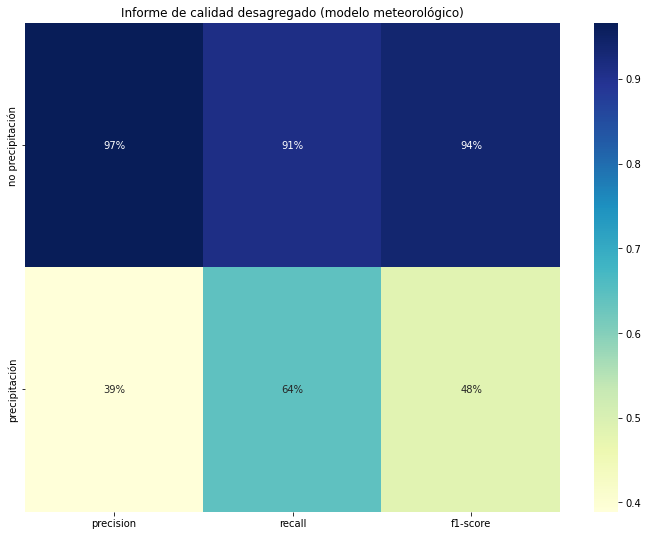

In [9]:
from sklearn.metrics import classification_report
import matplotlib.pyplot as plt
plt.figure(figsize=(12, 9))
plt.title("Informe de calidad desagregado (modelo meteorológico)")
import seaborn as sns
cr=pd.DataFrame(classification_report(df_all4k.prec_l, df_all4k.prec0_l,output_dict=True)).T
sns.heatmap(cr[:-3].drop(columns=["support"]),annot=True,cmap="YlGnBu",fmt='.0%');


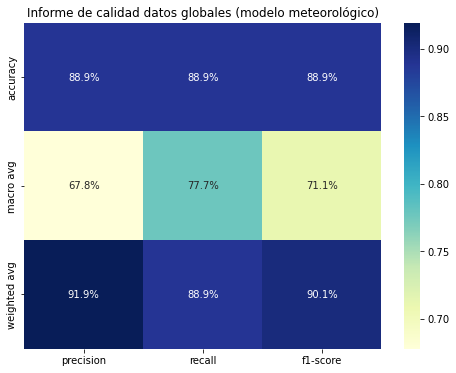

In [10]:
plt.figure(figsize=(8, 6))
plt.title("Informe de calidad datos globales (modelo meteorológico)")
sns.heatmap(cr[-3:].drop(columns=["support"]),annot=True,cmap="YlGnBu",fmt='.1%');

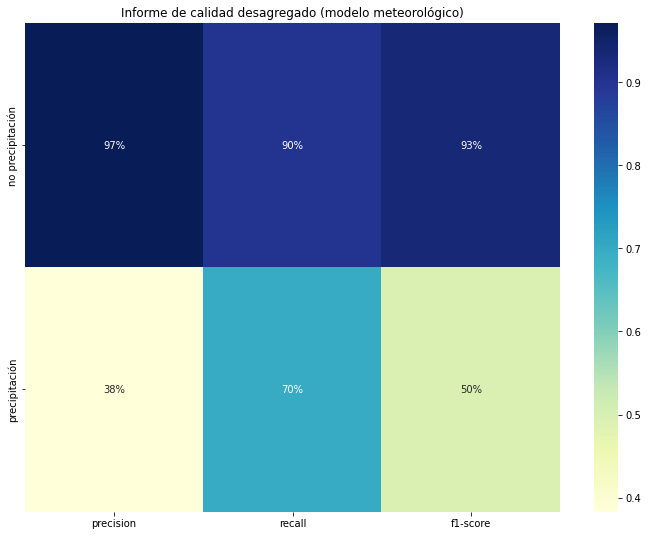

In [11]:
from sklearn.metrics import classification_report
import matplotlib.pyplot as plt
plt.figure(figsize=(12, 9))
plt.title("Informe de calidad desagregado (modelo meteorológico)")
import seaborn as sns
cr=pd.DataFrame(classification_report(df_all4k.prec_l, df_all4k.prec1_l,output_dict=True)).T
sns.heatmap(cr[:-3].drop(columns=["support"]),annot=True,cmap="YlGnBu",fmt='.0%');

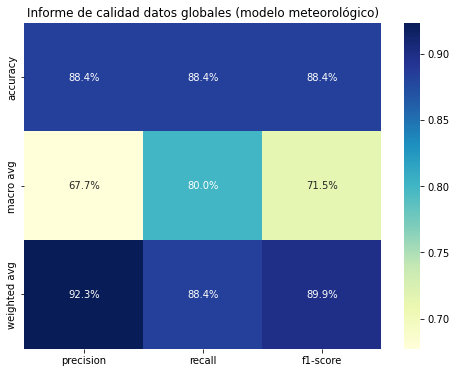

In [29]:
plt.figure(figsize=(8, 6))
plt.title("Informe de calidad datos globales (modelo meteorológico)")
sns.heatmap(cr[-3:].drop(columns=["support"]),annot=True,cmap="YlGnBu",fmt='.1%');

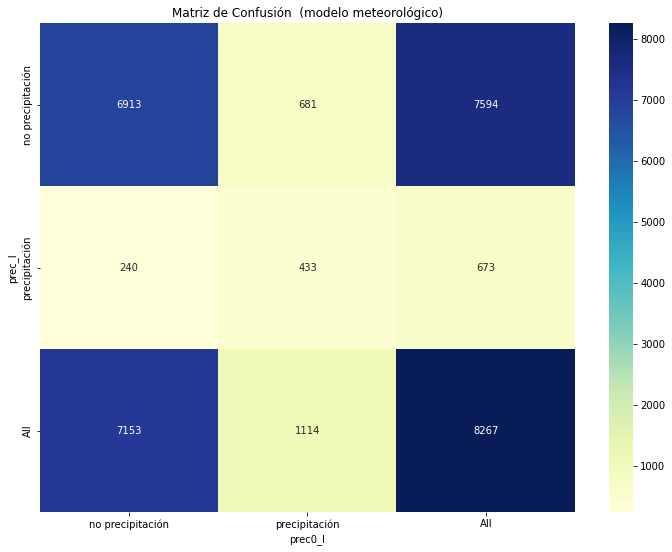

In [12]:
import matplotlib.pyplot as plt
plt.figure(figsize=(12, 9))
plt.title("Matriz de Confusión  (modelo meteorológico)")
import seaborn as sns
global_sc=pd.crosstab(df_all4k.prec_l, df_all4k.prec0_l,margins=True,)
sns.heatmap(global_sc,annot=True,cmap="YlGnBu",fmt='.0f');

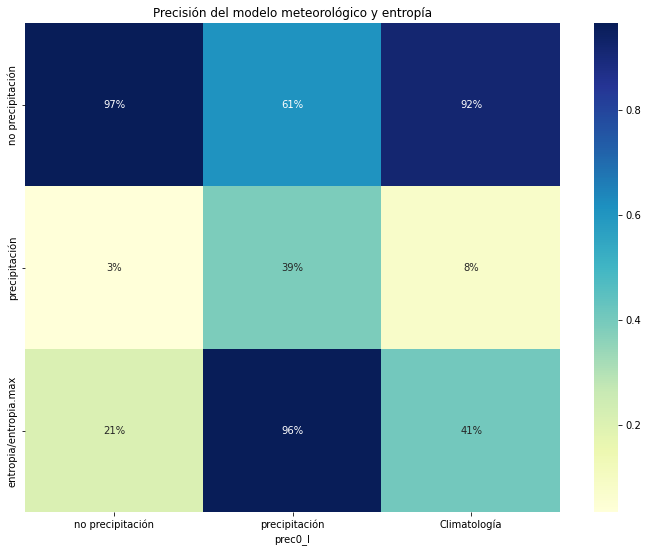

In [13]:
import math
from scipy.stats import entropy
plt.figure(figsize=(12, 9))
plt.title("Precisión del modelo meteorológico y entropía")
column_sc=pd.crosstab(df_all4k.prec_l, df_all4k.prec0_l, margins=True,normalize="columns")
column_sc=column_sc.append(pd.DataFrame(entropy(column_sc,base=2)/(math.log2(column_sc.shape[0])),columns=["entropia/entropia.max"],
                    index=column_sc.columns).T).rename(columns={"All":"Climatología"})
sns.heatmap(column_sc,annot=True,cmap="YlGnBu",fmt='.0%');

**Forecast D0**

In [ ]:
#ria forecast d1
ria_model4k=pd.read_csv("/content/drive/MyDrive/Colab Notebooks/Marin/lat42.39707lon-8.69362p4R4KmD0.csv",parse_dates=["time"]).drop(columns=["Unnamed: 0"]).set_index("time")
ria_model4k

In [7]:
#label meteorological model prec points 0 and 1
ria_model4k["prec0_l"]=pd.cut(ria_model4k["prec0"], bins=interval,retbins=False,labels=labels).map({a:b for a,b in zip(interval,labels)}).astype(str)
ria_model4k["prec1_l"]=pd.cut(ria_model4k["prec1"], bins=interval,retbins=False,labels=labels).map({a:b for a,b in zip(interval,labels)}).astype(str)
df_all4k=pd.concat([station,ria_model4k],axis=1).dropna()
df_all4k=df_all4k.drop(columns=["prec"])
df_all4k[["prec_l","prec0_l","prec1_l"]].sample(20)

,prec_l,prec0_l,prec1_l
time,,,
2021-04-12 18:00:00,no precipitación,no precipitación,no precipitación
2021-11-01 10:00:00,no precipitación,no precipitación,no precipitación
2021-05-08 15:00:00,no precipitación,no precipitación,no precipitación
2021-06-10 07:00:00,no precipitación,no precipitación,no precipitación
2021-04-03 19:00:00,no precipitación,no precipitación,no precipitación
2021-12-12 04:00:00,no precipitación,no precipitación,no precipitación
2021-11-16 14:00:00,no precipitación,no precipitación,no precipitación
2021-05-16 15:00:00,no precipitación,no precipitación,no precipitación
2022-01-28 05:00:00,no precipitación,no precipitación,no precipitación


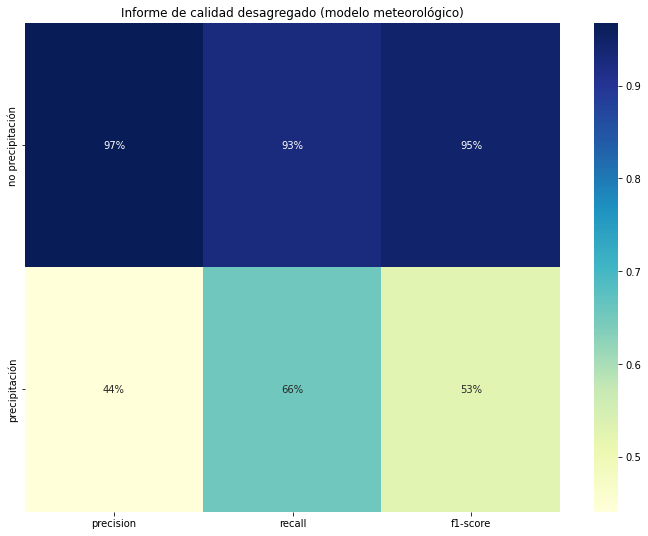

In [8]:
from sklearn.metrics import classification_report
import matplotlib.pyplot as plt
plt.figure(figsize=(12, 9))
plt.title("Informe de calidad desagregado (modelo meteorológico)")
import seaborn as sns
cr=pd.DataFrame(classification_report(df_all4k.prec_l, df_all4k.prec0_l,output_dict=True)).T
sns.heatmap(cr[:-3].drop(columns=["support"]),annot=True,cmap="YlGnBu",fmt='.0%');


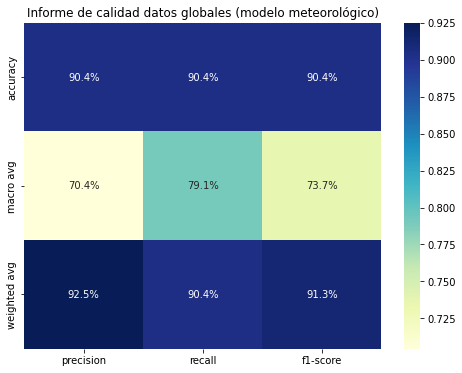

In [9]:
plt.figure(figsize=(8, 6))
plt.title("Informe de calidad datos globales (modelo meteorológico)")
sns.heatmap(cr[-3:].drop(columns=["support"]),annot=True,cmap="YlGnBu",fmt='.1%');

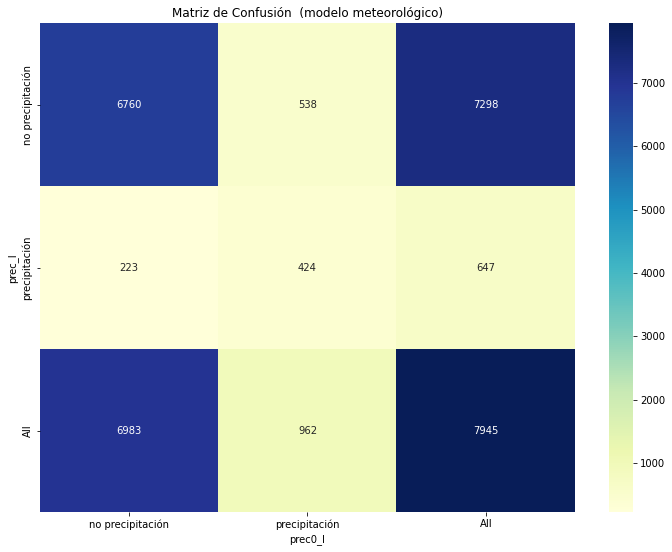

In [10]:
import matplotlib.pyplot as plt
plt.figure(figsize=(12, 9))
plt.title("Matriz de Confusión  (modelo meteorológico)")
import seaborn as sns
global_sc=pd.crosstab(df_all4k.prec_l, df_all4k.prec0_l,margins=True,)
sns.heatmap(global_sc,annot=True,cmap="YlGnBu",fmt='.0f');

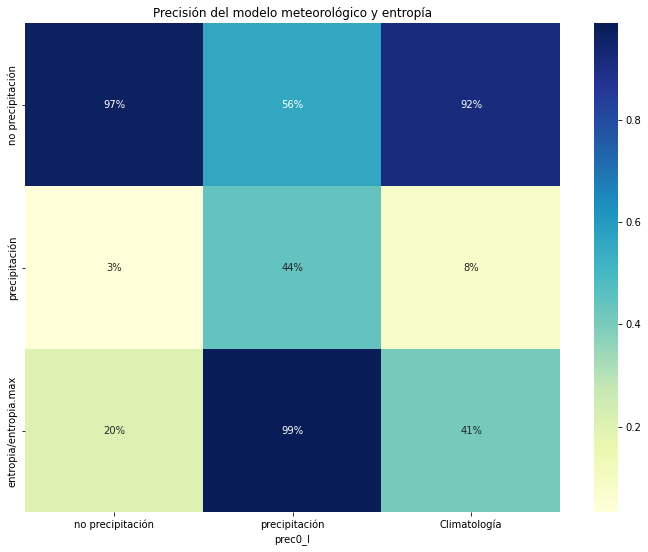

In [11]:
import math
from scipy.stats import entropy
plt.figure(figsize=(12, 9))
plt.title("Precisión del modelo meteorológico y entropía")
column_sc=pd.crosstab(df_all4k.prec_l, df_all4k.prec0_l, margins=True,normalize="columns")
column_sc=column_sc.append(pd.DataFrame(entropy(column_sc,base=2)/(math.log2(column_sc.shape[0])),columns=["entropia/entropia.max"],
                    index=column_sc.columns).T).rename(columns={"All":"Climatología"})
sns.heatmap(column_sc,annot=True,cmap="YlGnBu",fmt='.0%');

In [1]:
!pip install pycaret

     |████████████████████████████████| 301 kB 26.9 MB/s 
     |████████████████████████████████| 2.0 MB 48.9 MB/s 
     |████████████████████████████████| 1.3 MB 43.0 MB/s 
     |████████████████████████████████| 261 kB 45.4 MB/s 
     |████████████████████████████████| 15.6 MB 35.4 MB/s 
     |████████████████████████████████| 1.7 MB 55.7 MB/s 
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Installing backend dependencies ... done
    Preparing wheel metadata ... done
     |████████████████████████████████| 114 kB 45.2 MB/s 
     |████████████████████████████████| 56 kB 4.5 MB/s 
     |████████████████████████████████| 86 kB 5.1 MB/s 
     |████████████████████████████████| 274 kB 48.8 MB/s 
     |████████████████████████████████| 6.8 MB 38.7 MB/s 
     |████████████████████████████████| 167 kB 44.3 MB/s 
     |████████████████████████████████| 303 kB 47.7 MB/s 
     |████████████████████████████████| 10.9 MB 41.0 MB/s 
     |███████████████

In [12]:
from pycaret.classification import *
clas = setup(df_all4k.drop(columns=["prec0_l","prec1_l"]),target = 'prec_l',
             session_id=4,normalize=True ,train_size=.85,remove_multicollinearity=False,
             fix_imbalance=False,ignore_low_variance=True) 

,Description,Value
0,session_id,4
1,Target,prec_l
2,Target Type,Binary
3,Label Encoded,"no precipitación: 0, precipitación: 1"
4,Original Data,"(7945, 101)"
5,Missing Values,False
6,Numeric Features,100
7,Categorical Features,0
8,Ordinal Features,False
9,High Cardinality Features,False


In [21]:
compare_models(fold=5,sort="F1")

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
et,Extra Trees Classifier,0.9249,0.9338,0.5798,0.5347,0.5562,0.5153,0.5158,1.474
lightgbm,Light Gradient Boosting Machine,0.9187,0.9258,0.6130,0.5004,0.5509,0.5067,0.5100,1.530
rf,Random Forest Classifier,0.9183,0.9254,0.5885,0.4985,0.5396,0.4951,0.4973,6.294
gbc,Gradient Boosting Classifier,0.8839,0.9167,0.7409,0.3883,0.5093,0.4507,0.4812,17.058
ada,Ada Boost Classifier,0.8760,0.9073,0.7286,0.3679,0.4888,0.4269,0.4593,5.056
knn,K Neighbors Classifier,0.8557,0.8756,0.7705,0.3331,0.4649,0.3964,0.4433,3.124
lr,Logistic Regression,0.8407,0.9204,0.8373,0.3179,0.4609,0.3889,0.4519,1.836
lda,Linear Discriminant Analysis,0.8285,0.9184,0.8407,0.3018,0.4440,0.3684,0.4364,0.220
ridge,Ridge Classifier,0.8285,0.0000,0.8390,0.3016,0.4436,0.3679,0.4356,0.092
qda,Quadratic Discriminant Analysis,0.8453,0.8733,0.7531,0.3128,0.4417,0.3693,0.4178,0.142


ExtraTreesClassifier(bootstrap=False, ccp_alpha=0.0, class_weight=None,
                     criterion='gini', max_depth=None, max_features='auto',
                     max_leaf_nodes=None, max_samples=None,
                     min_impurity_decrease=0.0, min_impurity_split=None,
                     min_samples_leaf=1, min_samples_split=2,
                     min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=-1,
                     oob_score=False, random_state=2, verbose=0,
                     warm_start=False)

In [63]:
et=create_model("et",n_estimators=150,fold=5)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.9467,0.9403,0.4107,0.8364,0.5509,0.5260,0.5639
1,0.9345,0.9409,0.3153,0.6863,0.4321,0.4024,0.4369
2,0.9395,0.9458,0.3750,0.7368,0.4970,0.4685,0.4989
3,0.9431,0.9518,0.4464,0.7353,0.5556,0.5271,0.5459
4,0.9388,0.9149,0.3482,0.7500,0.4756,0.4477,0.4852
Mean,0.9405,0.9387,0.3791,0.7490,0.5022,0.4743,0.5061
SD,0.0041,0.0126,0.0460,0.0488,0.0466,0.0477,0.0452


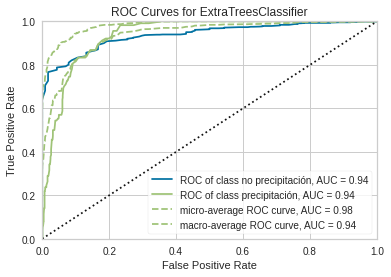

In [64]:
plot_model(et, plot = 'auc')

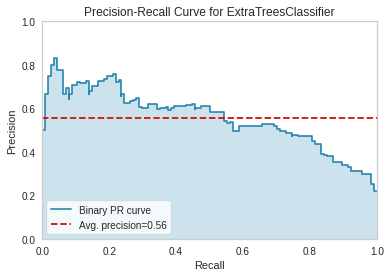

In [65]:
plot_model(et, plot = 'pr')

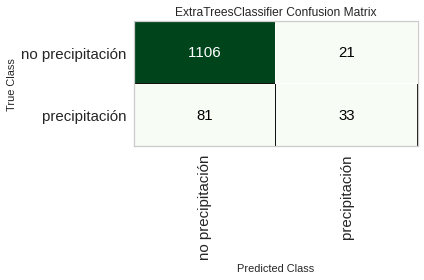

In [66]:
plot_model(et,'confusion_matrix')

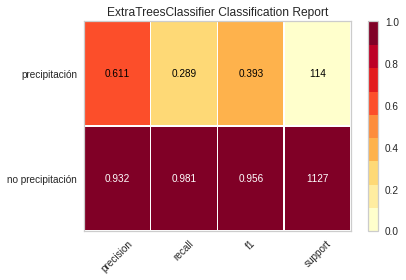

In [67]:
plot_model(et,'class_report')

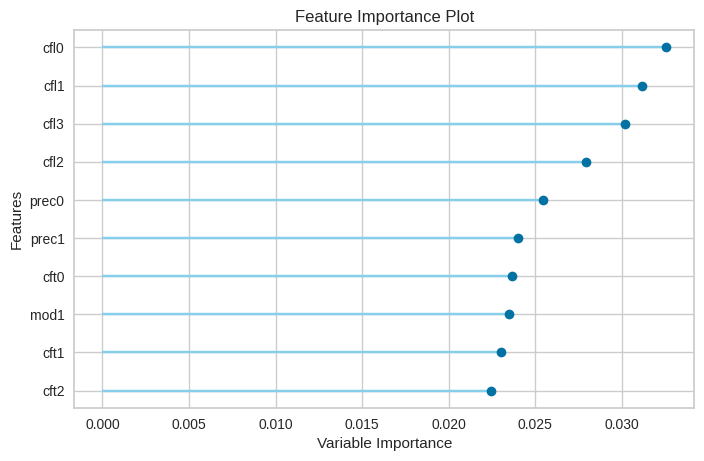

In [68]:
plot_model(et,"feature")

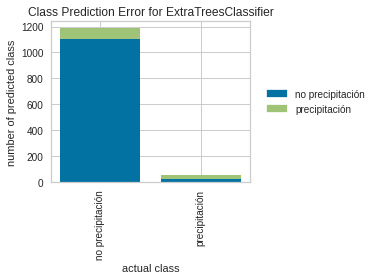

In [69]:
plot_model(et,"error")

**Export model**

In [13]:
x_var=get_config("X_train").columns
x_var

Index(['dir0', 'mod0', 'wind_gust0', 'temp0', 'rh0', 'visibility0', 'lhflx0',
       'lwflx0', 'prec0', 'swflx0', 'shflx0', 'cape0', 'cin0', 'cfh0', 'cfl0',
       'cft0', 'dir1', 'mod1', 'wind_gust1', 'temp1', 'rh1', 'visibility1',
       'lhflx1', 'lwflx1', 'prec1', 'swflx1', 'shflx1', 'cape1', 'cin1',
       'cfh1', 'cfl1', 'cft1', 'T8501', 'dir2', 'snowlevel2', 'mod2',
       'wind_gust2', 'temp2', 'rh2', 'visibility2', 'lhflx2', 'lwflx2',
       'prec2', 'swflx2', 'shflx2', 'cape2', 'cin2', 'cfh2', 'cfl2', 'cft2',
       'dir3', 'mod3', 'wind_gust3', 'temp3', 'rh3', 'visibility3', 'lhflx3',
       'lwflx3', 'prec3', 'swflx3', 'shflx3', 'cape3', 'cin3', 'cfh3', 'cfl3',
       'cft3'],
      dtype='object')

In [14]:

Y=df_all4k.prec_l
X=df_all4k[x_var]

In [15]:
from sklearn.ensemble import ExtraTreesClassifier
from lightgbm.sklearn import LGBMClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,Y, test_size=0.1, random_state=1)
ml_model=ExtraTreesClassifier(n_estimators=150).fit(X_train,y_train)

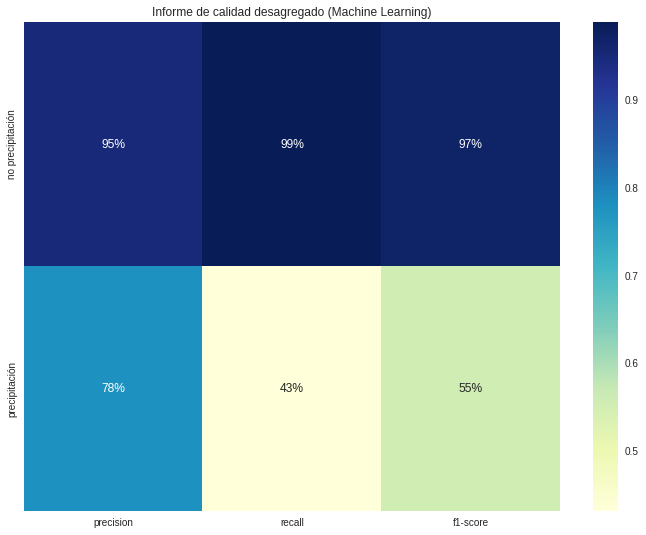

In [16]:
from sklearn.metrics import classification_report
import matplotlib.pyplot as plt
import seaborn as sns
cr=pd.DataFrame(classification_report(y_test, ml_model.predict(X_test),output_dict=True)).T
plt.figure(figsize=(12, 9))
plt.title("Informe de calidad desagregado (Machine Learning)")
sns.heatmap(cr[:-3].drop(columns=["support"]),annot=True,cmap="YlGnBu",fmt='.0%');


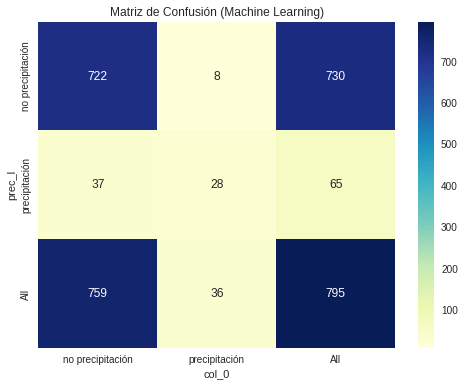

In [17]:
plt.figure(figsize=(8, 6))
plt.title("Matriz de Confusión (Machine Learning)")
import seaborn as sns
global_sc=pd.crosstab(y_test, ml_model.predict(X_test),margins=True,)
sns.heatmap(global_sc,annot=True,cmap="YlGnBu",fmt='.0f');

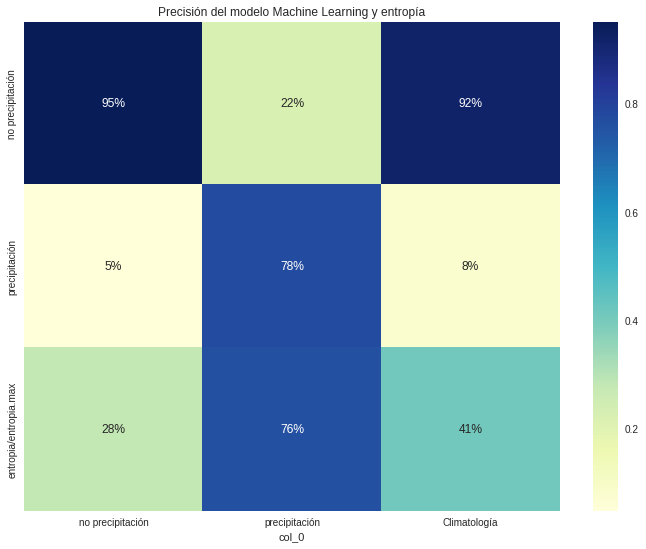

In [19]:
import math
from scipy.stats import entropy
plt.figure(figsize=(12, 9))
plt.title("Precisión del modelo Machine Learning y entropía")
column_sc=pd.crosstab(y_test, ml_model.predict(X_test), margins=True,normalize="columns")
column_sc=column_sc.append(pd.DataFrame(entropy(column_sc,base=2)/(math.log2(column_sc.shape[0])),columns=["entropia/entropia.max"],
                    index=column_sc.columns).T).rename(columns={"All":"Climatología"})
sns.heatmap(column_sc,annot=True,cmap="YlGnBu",fmt='.0%');

In [22]:
import pickle
model_dict={"x_var":x_var,"ml_model":ml_model,"coor":coor}
pickle.dump(model_dict, open("prec_mar_d0.al", 'wb'))

In [61]:
pd.DataFrame(ml_model.predict_proba(X_test),columns=["no p","precipitación"])["precipitación"].map(lambda n: '{:.0%}'.format(n))

0      13%
1       0%
2       2%
3       9%
4       5%
      ... 
822     1%
823     9%
824    53%
825     0%
826     0%
Name: precipitación, Length: 827, dtype: object